# Building a binary classifier model with MINST dataset

### MINST dataset is a set of 70,000 small images of handwritten digits by students and employees of the US Census-Bureau

### 1. Import MINST dataset

In [1]:
from sklearn.datasets import fetch_mldata # import fetch_mldata function from sklearn database
dataset = fetch_mldata('MNIST original') # using fetch_mldata function pull in MINST dataset
# dataset # visualise the raw data

C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### 2. Assigning x-features and y-target, followed by data pre-processing

In [2]:
import numpy as np
x_feature = dataset['data']
y_target = dataset['target']
print(x_feature)
print('')
print(y_target)
print('')
print(x_feature.shape)
print('')
print(y_target.shape)
print('')

# for x_feature, it has a shape size of 70000 and 784 whereby there are 70000 images and each image has 784 features
# each image has a 28x28 pixels characteristic and each feature represents one pixel's intensity which range 
# between 0 (white) and 255 (black)

count_numbers = dict()
number_index = list()
for i in range (len(y_target)):
    if y_target[i] in count_numbers.keys():
        count_numbers[y_target[i]] += 1
    else:
        count_numbers[y_target[i]] = 1
        number_index.append(i)
print(count_numbers)
print('')
print(number_index)
minimum_count = min(count_numbers.values())

y_target_modified = list()
x_feature_modified = list()
total_numbers = 10
for index in number_index:
    for count in range(minimum_count):
        x_feature_modified.append(x_feature[index+count])
        y_target_modified.append(y_target[index+count])

x_feature_modified = np.array(x_feature_modified).reshape(len(x_feature_modified),-1)
y_target_modified = np.array(y_target_modified).reshape(len(y_target_modified),-1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[0. 0. 0. ... 9. 9. 9.]

(70000, 784)

(70000,)

{0.0: 6903, 1.0: 7877, 2.0: 6990, 3.0: 7141, 4.0: 6824, 5.0: 6313, 6.0: 6876, 7.0: 7293, 8.0: 6825, 9.0: 6958}

[0, 5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200, 54051]


### 3. Splitting dataset into training and testing

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feature_modified,
                                                    y_target_modified,
                                                    test_size = 0.20,
                                                    random_state = 42)
print(x_train)
print('')
print(x_test)
print('')
print(y_train)
print('')
print(y_test)
print('')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[[6.]
 [3.]
 [7.]
 ...
 [0.]
 [2.]
 [9.]]

[[3.]
 [0.]
 [3.]
 ...
 [4.]
 [1.]
 [1.]]



### 4. Building binary classifier for the number '8'

In [4]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
y_train_number_8 = (y_train == 8)
y_test_number_8 = (y_test == 8)
print((y_train_number_8))
print('')
print(len(y_test_number_8))
print('')

# training SGDClassifier model
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(x_train,y_train_number_8)
pred_results_sgd_classifier = sgd_classifier.predict(x_test)

# # training LogisticRegression model
# logistic_model = LogisticRegression(solver='newton-cg', 
#                                     max_iter=100)
# # (‘lbfgs’, ‘newton-cg’, ‘liblinear’, ‘sag’, ‘saga’ ----> different types of solver)
# logistic_model.fit(x_train,y_train_number_8)
# pred_results_logistic_classifier = logistic_model.predict(x_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]

12626



C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5. Performance evaluation

#### a. Cross-Validation

In [5]:
from sklearn.model_selection import cross_val_score
import pandas as pd

number_of_folds = 5
score_1 = cross_val_score(sgd_classifier,
                         x_test,
                         y_test_number_8,
                         cv = number_of_folds,
                         scoring = 'accuracy') # cv = 5 means splitting the training dataset into 5 folds, then
# making predictions and evaluating them on each of the 5 folds using the model 
# which is trained on the remaining folds, i.e. 4 folds
score_1 = [round(i,3) *100 for i in (score_1)]
CV_table = pd.DataFrame(columns=['Fold number','Accuracy (%) based on cross-validation'])
CV_table['Fold number'] = [i+1 for i in range (number_of_folds)]
CV_table['Accuracy (%) based on cross-validation'] = score_1
CV_table

C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defau

,Fold number,Accuracy (%) based on cross-validation
0,1,91.1
1,2,91.4
2,3,93.2
3,4,92.3
4,5,93.8


#### b. Confusion Matrix

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(sgd_classifier,
                         x_test,
                         y_test_number_8,
                         cv = number_of_folds)
score_2 = confusion_matrix(y_test_number_8,y_pred)
print(score_2)
print('')
# first row represents negative class, i.e. non-8s images (different from powerpoint slides)
# second row represents positive class, i.e. 8s images (different from powerpoint slides)

TN = score_2[0][0]
FP = score_2[0][1]
FN = score_2[1][0]
TP = score_2[1][1]
print(TN,FP,FN,TP)

C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WZCHE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defau

[[10974   448]
 [  517   687]]

10974 448 517 687


#### c. Precision, Recall, F1 score

In [7]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_SCORE = 2* ((precision*recall)/(precision+recall))
print('Precision value is '+ str(round(precision,3))+'.')
print('')
print('Recall value is '+str(round(recall,3))+'.')
print('')
print('F1 score is '+str(round(F1_SCORE,3))+'.')
print('')

Precision value is 0.605.

Recall value is 0.571.

F1 score is 0.587.



#### d. ROC curve

The ROC score (area under the curve for the ROC curve) is 0.926.



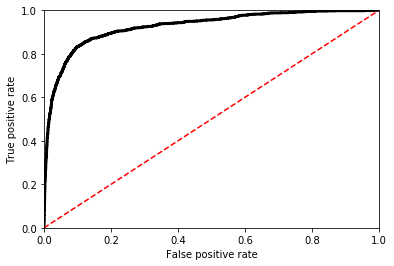

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_scores = sgd_classifier.decision_function(x_test)
FPR,TPR,thresholds = roc_curve(y_test_number_8,y_scores)
roc_score = roc_auc_score(y_test_number_8,y_scores)
print('The ROC score (area under the curve for the ROC curve) is ' + str(round(roc_score,3)) + '.')
print('')

plt.plot(FPR,TPR,'k-',linewidth = 3,)
plt.plot([0,1],[0,1],'r--')
plt.axis([0,1,0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()